# The Double Pendulum
This notebook demonstrates how to solve the equations of motion for the double pendulum numerically. Furthermore, we plot and animate the resulting motion.

In [1]:
# numpy is a covenient library for fast numerical computation
import numpy as np
# scipy contains an ordinary differential equation (ODE) solver
from scipy.integrate import solve_ivp
# visualization library
import matplotlib.pyplot as plt
# add animation
import matplotlib.animation as animation
# add HTML compatibility for notebook animation
from IPython.display import HTML

In [2]:
# define the set of differential equations for the ODE solver


def double_pendulum(t, z,  l1, l2, m1, m2, g):
    """
    ODEs for the Double Pendulum.
    
    Parameters (float):
    -----------
     theta1 ... angle of first bob [rad]
     theta2 ... angle of second bob [rad]
     w1     ... angular velocity of first bob (d/dt theta1) [rad/s]
     w2     ... angular velocity of second bob (d/dt theta2) [rad/s]
     g      ... gravitational acceleration at sea level [N/kg]
     l1     ... length of first pendulum [m]
     l2     ... length of second pendulum [m]
     m1     ... mass of first pendulum [kg]
     m2     ... mass of second pendulum [kg]
    
    Returns (float):
    --------
    dtheta1 ... angular velocity of first bob (d/dt theta1) [rad/s]
    dtheta2 ... angular velocity of second bob (d/dt theta2) [rad/s]
    dw1     ... angular acceleration of first bob (d/dt theta1) [rad/s^2]
    dw2     ... angular acceleration of second bob (d/dt theta2) [rad/s]
    """
    theta1, theta2, w1, w2 = z
    
    mu = m2/(m1+m2)
    th2mth1 = theta2-theta1 
    fac=1/(l1*l2*(1-mu*np.cos(th2mth1)**2))
     
    A = np.array([[l2, -l2*mu*np.cos(th2mth1)],[-l1*np.cos(th2mth1),l1]])
    B = np.array([mu*l2*w2**2*np.sin(th2mth1)- g*np.sin(theta1),
                  -l1*w1**2*np.sin(th2mth1)-g*np.sin(theta2)])

    [ddtheta1, ddtheta2] = fac*np.matmul(A,B)
    
    dtheta1 = w1
    dtheta2 = w2
    dw1 = ddtheta1
    dw2 = ddtheta2
   
    return [dtheta1, dtheta2, dw1, dw2]

In [33]:
# define initial conditions, i.e. state vector z=[theta1, theta2, d/dt theta1, d/dt theta2] at time t=0
z0 = [1, -1, 0, 0]

# define constants
l1 = 1
l2 = 1
m1 = 1
m2 = 1
g = 9.81


In [34]:
# solve the ODE / initial value problem for a set of parameter values
sol = solve_ivp(double_pendulum, [0, 100], z0, args=(l1,l2,m1,m2,g),
                dense_output=True, rtol=1e-12, atol=1e-12)

In [35]:
# table the solution against time
t = np.linspace(0, 10, 300)
z = sol.sol(t)

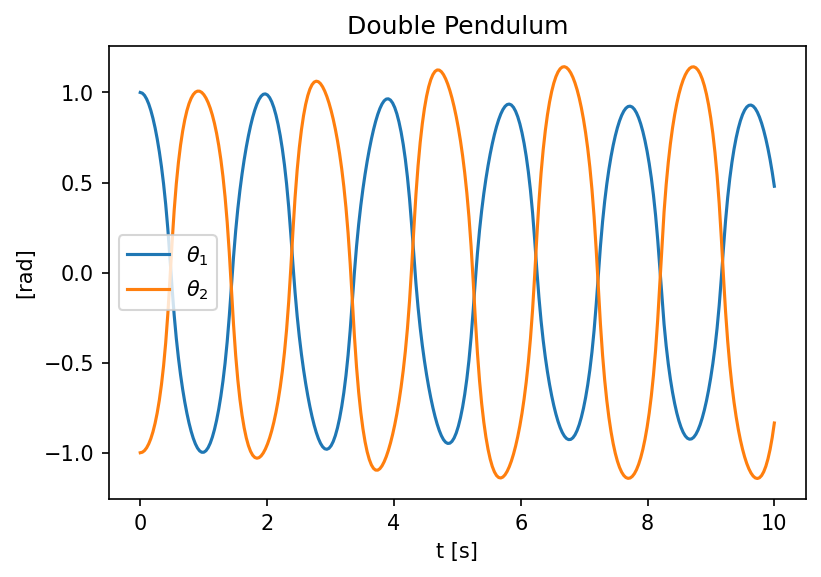

In [36]:
# plot theta1 and theta2 as function of time
plt.figure(dpi=150)
plt.plot(t, z[0:1].T, label= r'$\theta_1$')
plt.plot(t, z[1:2].T,  label= r'$\theta_2$')
plt.xlabel('t [s]')
plt.ylabel('[rad]')
plt.title('Double Pendulum')
plt.legend()
plt.show()

In [37]:
# table the solution against time
t = np.linspace(0, 50, 1000)
z = sol.sol(t)

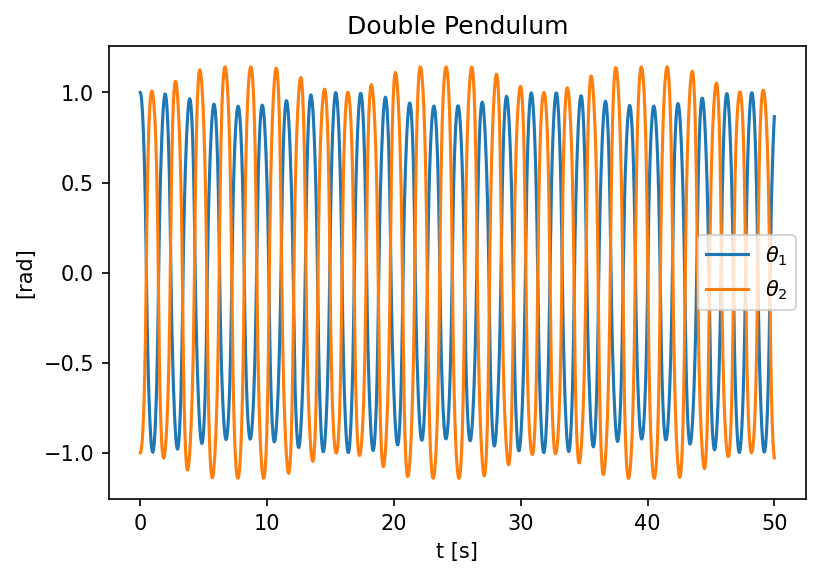

In [38]:
# plot theta1 and theta2 as function of time for longer
plt.figure(dpi=150)
plt.plot(t, z[0:1].T, label= r'$\theta_1$')
plt.plot(t, z[1:2].T,  label= r'$\theta_2$')
plt.xlabel('t [s]')
plt.ylabel('[rad]')
plt.title('Double Pendulum')
plt.legend()
plt.show()

In [39]:
# convert polar coordinates of the pendulum to x,y coordinates; note the offset in the polar angle.
def polar2xy(r, theta, x0=0, y0=0, theta0=1.5*np.pi):
    """
    Convert polar coordinates to Cartesian x,y coordinates.
    
    Parameters (float):
    -----------
    r     ... distance 
    theta ... angle [rad] 
    
    Optional (float):
    ---------
    x0, y0 ... center offset for Cartesian coordinates
    theta0 ... angle offset for Polar coordinates
    
    Returns (float):
    --------
    x,y ... Cartesian coordinates (float)
    
    """
    x = r * np.cos(theta + theta0) + x0
    y = r * np.sin(theta + theta0) + y0

    return x, y


In [40]:
theta1_t = np.array(z[0:1].T).flatten()
theta2_t = np.array(z[1:2].T).flatten()

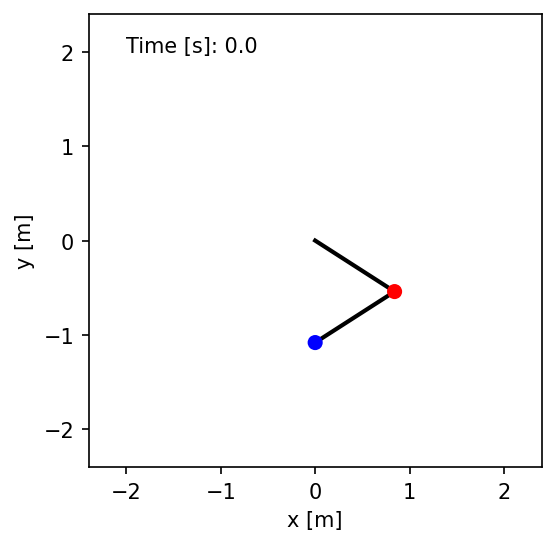

In [41]:
# Initialize the animation plot. Make the aspect ratio equal so it looks right.
fig = plt.figure(dpi=150)
ax = fig.add_subplot(aspect='equal')
# The pendulum rod, in its initial position.
L = l1+l2
dt = 0.01
nsteps = 1000
x1_0, y1_0 = polar2xy(l1, theta1_t[0])
x2_0, y2_0 = polar2xy(l2, theta2_t[0])
line1, = ax.plot([0, x1_0], [0, y1_0], lw=2, c='k')
line2, = ax.plot([x1_0, x1_0+x2_0], [y1_0, y1_0+y2_0], lw=2, c='k')
# The pendulum bob: set zorder so that it is drawn over the pendulum rod.
bob_radius1 = 0.08
circle1 = ax.add_patch(plt.Circle((x1_0, y1_0), bob_radius1,
                      fc='r', zorder=3))

# The pendulum bob: set zorder so that it is drawn over the pendulum rod.
bob_radius2 = 0.08
circle2 = ax.add_patch(plt.Circle((x2_0, y2_0), bob_radius2,
                      fc='b', zorder=3))
# Set the plot limits so that the pendulum has room to swing!
ax.set_xlim(-L*1.2, L*1.2)
ax.set_ylim(-L*1.2, L*1.2)

ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')

s = "Time [s]:               "
time_text = ax.text(-2, 2, s, zorder = 3)

def animate(i):
    """Update the animation at frame i."""
    x1, y1 = polar2xy(l1,theta1_t[i])
    x2, y2 = polar2xy(l2,theta2_t[i])
    line1.set_data([0, x1], [0, y1])
    line2.set_data([x1,x1+x2], [y1,y1+y2])
    circle1.set_center((x1, y1))
    circle2.set_center((x1+x2, y1+y2))
   
    s = "Time [s]: " + str(round(t[i],2)) 
    time_text.set_text(s)
     
    
nframes = nsteps
interval = dt * 8000
ani = animation.FuncAnimation(fig, animate, frames=nframes, repeat=True,
                              interval=interval)

# Draw initial conditions
plt.draw()



In [42]:
# create animation in Jupyter Notebook
HTML(ani.to_html5_video())